# Projet Computational Statistics / Housing
## Traitement des données

In [2]:
# Import for the project

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [3]:
# Affichage plus lisible
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Train Data:")
display(train_df.head())


Train Data:


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
# Le but maintenant va être de trier notre dataset et de repérer les colonnes utiles ainsi que 
# les colonnes qui au contraire sont inutiles et n'ont pas d'impact sur SalePrice. 

# On regarde les colonnes avec beaucoup de valeurs manquantes et on regarde aussi rapidement celles qui ont une corrélation 
# linéaires avec SalePrice, c'est-à-dire celles qui montent ou descendent comme elle. (Test de Pearson)



# Colonnes avec des valeurs manquantes
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Colonnes avec valeurs manquantes :")
display(missing_values)

# Corrélation des variables numériques avec SalePrice
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns
correlation = train_df[numerical_features].corr()['SalePrice'].sort_values(ascending=False)

print("Corrélation avec SalePrice :")
display(correlation)

# Variables les plus corrélées (positif ou négatif > 0.3)
print("Variables avec |corrélation| > 0.3 :")
display(correlation[abs(correlation) > 0.3])

#  Nombre de modalités pour chaque variable catégorielle
categorical_features = train_df.select_dtypes(include=['object']).columns

print("Nombre de modalités par variable catégorielle :")
for col in categorical_features:
    print(f"{col}: {train_df[col].nunique()} modalités")

# Colonnes constantes (1 seule valeur unique)
constant_columns = [col for col in train_df.columns if train_df[col].nunique() == 1]
print("Colonnes constantes (à supprimer éventuellement) :", constant_columns)


Colonnes avec valeurs manquantes :


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Corrélation avec SalePrice :


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Variables avec |corrélation| > 0.3 :


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64

Nombre de modalités par variable catégorielle :
MSZoning: 5 modalités
Street: 2 modalités
Alley: 2 modalités
LotShape: 4 modalités
LandContour: 4 modalités
Utilities: 2 modalités
LotConfig: 5 modalités
LandSlope: 3 modalités
Neighborhood: 25 modalités
Condition1: 9 modalités
Condition2: 8 modalités
BldgType: 5 modalités
HouseStyle: 8 modalités
RoofStyle: 6 modalités
RoofMatl: 8 modalités
Exterior1st: 15 modalités
Exterior2nd: 16 modalités
MasVnrType: 3 modalités
ExterQual: 4 modalités
ExterCond: 5 modalités
Foundation: 6 modalités
BsmtQual: 4 modalités
BsmtCond: 4 modalités
BsmtExposure: 4 modalités
BsmtFinType1: 6 modalités
BsmtFinType2: 6 modalités
Heating: 6 modalités
HeatingQC: 5 modalités
CentralAir: 2 modalités
Electrical: 5 modalités
KitchenQual: 4 modalités
Functional: 7 modalités
FireplaceQu: 5 modalités
GarageType: 6 modalités
GarageFinish: 3 modalités
GarageQual: 5 modalités
GarageCond: 5 modalités
PavedDrive: 3 modalités
PoolQC: 3 modalités
Fence: 4 modalités
MiscFeature: 4

In [5]:
# Variables quantitatives sélectionnées
quant_vars = [
    "OverallQual", "GrLivArea", "GarageCars", "GarageArea",
    "TotalBsmtSF", "FullBath", "TotRmsAbvGrd",
    "YearBuilt", "YearRemodAdd"
]

# Variables qualitatives sélectionnées
qual_vars = [
    "MSZoning", "Neighborhood", "HouseStyle", "ExterQual",
    "BsmtQual", "KitchenQual", "GarageType", "SaleCondition",
    "CentralAir"]


# Variable cible
target_var = "SalePrice"

# Liste finale des variables à conserver
final_vars = quant_vars + qual_vars + [target_var]

# Création du nouveau DataFrame avec uniquement ces colonnes
train_clean = train_df[final_vars]

# Pour test_df (pas de SalePrice)
test_final_vars = quant_vars + qual_vars
test_clean = test_df[test_final_vars]

# Affichage pour vérification
print("Variables conservées :", train_clean.columns.tolist())
print("\nAperçu du train_df sélectionné :")
display(train_clean.head())

Variables conservées : ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MSZoning', 'Neighborhood', 'HouseStyle', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageType', 'SaleCondition', 'CentralAir', 'SalePrice']

Aperçu du train_df sélectionné :


OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  FullBath  \
0            7       1710           2         548          856         2   
1            6       1262           2         460         1262         2   
2            7       1786           2         608          920         2   
3            7       1717           3         642          756         1   
4            8       2198           3         836         1145         2   

   TotRmsAbvGrd  YearBuilt  YearRemodAdd MSZoning Neighborhood HouseStyle  \
0             8       2003          2003       RL      CollgCr     2Story   
1             6       1976          1976       RL      Veenker     1Story   
2             6       2001          2002       RL      CollgCr     2Story   
3             7       1915          1970       RL      Crawfor     2Story   
4             9       2000          2000       RL      NoRidge     2Story   

  ExterQual BsmtQual KitchenQual GarageType SaleCondition CentralAir  \
0        Gd       Gd          Gd     Attchd        Normal          Y   
1        TA       Gd          TA     Attchd        Normal          Y   
2        Gd       Gd          Gd     Attchd        Normal          Y   
3        TA       TA          Gd     Detchd       Abnorml          Y   
4        Gd       Gd          Gd     Attchd        Normal          Y   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [6]:
# Vérification des variables avec des trous 

print(train_clean.isnull().sum())


OverallQual       0
GrLivArea         0
GarageCars        0
GarageArea        0
TotalBsmtSF       0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
MSZoning          0
Neighborhood      0
HouseStyle        0
ExterQual         0
BsmtQual         37
KitchenQual       0
GarageType       81
SaleCondition     0
CentralAir        0
SalePrice         0
dtype: int64


In [7]:
# Remplir BsmtQual et GarageType avec "NA"

train_clean.loc[:, "BsmtQual"] = train_clean["BsmtQual"].fillna("NA")
test_clean.loc[:, "BsmtQual"] = test_clean["BsmtQual"].fillna("NA")

train_clean.loc[:, "GarageType"] = train_clean["GarageType"].fillna("NA")
test_clean.loc[:, "GarageType"] = test_clean["GarageType"].fillna("NA")

# Vérification finale
print(train_clean.isnull().sum())

OverallQual      0
GrLivArea        0
GarageCars       0
GarageArea       0
TotalBsmtSF      0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
MSZoning         0
Neighborhood     0
HouseStyle       0
ExterQual        0
BsmtQual         0
KitchenQual      0
GarageType       0
SaleCondition    0
CentralAir       0
SalePrice        0
dtype: int64


In [8]:
# Liste des variables qualitatives
qual_vars = [
    "MSZoning", "Neighborhood", "HouseStyle", "ExterQual",
    "BsmtQual", "KitchenQual", "GarageType", "SaleCondition", "CentralAir"
]

# Affichage des modalités et de leur fréquence pour chaque variable qualitative
for var in qual_vars:
    print(f"\nModalités de la variable '{var}':")
    print(train_clean[var].value_counts(dropna=False), "\n")


Modalités de la variable 'MSZoning':
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64 


Modalités de la variable 'Neighborhood':
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64 


Modalités de la variable 'HouseStyle':
HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64 


Modalités de la variable 'ExterQual':
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64 


Modalités de la variable 'BsmtQual':
BsmtQual
TA    649
Gd    618
Ex    121
NA

## Time series

Nous allons observer si la variable SalePrice suit une tendance générale grâce aux times series. Pour ce faire, nous allons prendre en compte les variables YrSold et MoSold, soient respectivement les mois et les années pour lesquels les maisons ont été vendues à un certain prix fixé dans SalePrice. 

Tout d'abord, la première étape consiste à prendre ces variables, et à établir une moyenne mensuelle des prix des maisons vendues de SalePrice pour pouvoir analyser tout ceci convenablement. 

Date
2006-01-01    201090.000000
2006-02-01    194322.222222
2006-03-01    184982.200000
2006-04-01    174312.814815
2006-05-01    158928.289474
Name: SalePrice, dtype: float64


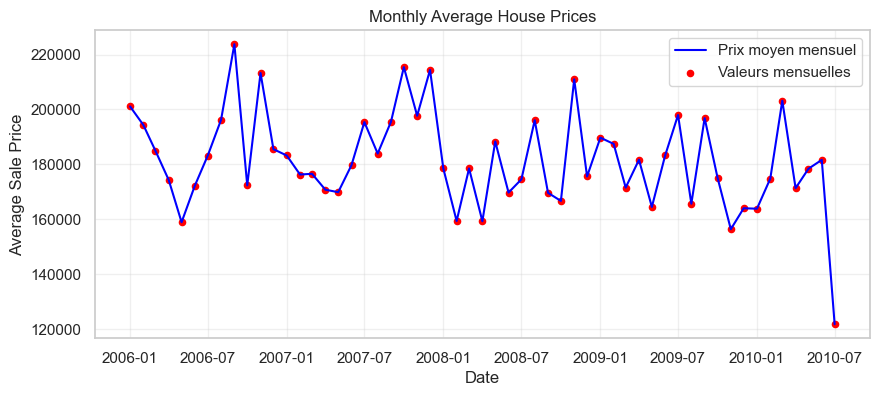

In [9]:
train_df = pd.read_csv("train.csv")

# Construction de la moyenne et des dates pour l'analyser des time series

train_df['Date'] = pd.to_datetime(train_df['YrSold'].astype(str) + '-' + train_df['MoSold'].astype(str) + '-01')
monthly_prices = train_df.groupby('Date')['SalePrice'].mean().sort_index()
print(monthly_prices.head())

# Plot de l'évolution de cette moyenne mensuelle des prix de vente pour se faire une idée visuelle. 

plt.figure(figsize=(10,4))
plt.plot(monthly_prices, label='Prix moyen mensuel', linestyle='-', color='blue')
plt.scatter(monthly_prices.index, monthly_prices.values, color='red', s=20, label='Valeurs mensuelles')
plt.title('Monthly Average House Prices')
plt.xlabel('Date')
plt.ylabel('Average Sale Price')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### ANALYSE DU GRAPHE : 

Voici le graphe de l'évolution des moyennes mensuelles entre 2006 et mi-2010 représentées par les points rouges. On constate que la série semble non-stationnaire, mais on ne remarque pas une croissance ou une décroissance flagrante générale. Par contre, il y a certaines choses qui sont intéressantes à regarder, comme par exemple les montées de prix au moment de l'été chaque année. Cela peut être un effet de saisonnalité ou quelque chose de semblable. Il est important aussi de regarder le cas de l'année 2010, où l'on voit une chute radicale entre le mois de Juin et Juillet qui peut aussi être intéressante à traiter car cela pourrait signifier l'aparition d'une valeur abérante. 

_______________

Pour mieux visualiser le graphe, nous allons le lisser grâce à une Moving Average et une Simple Exponential Smoothing :



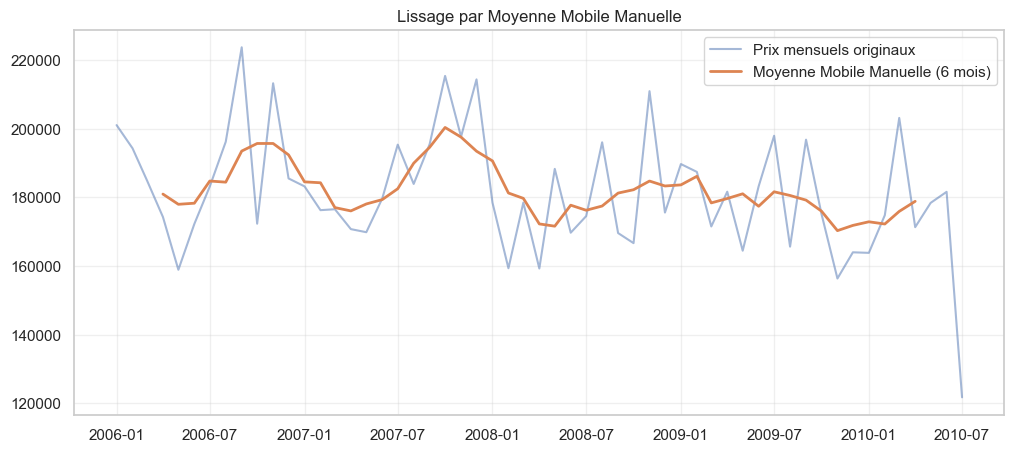

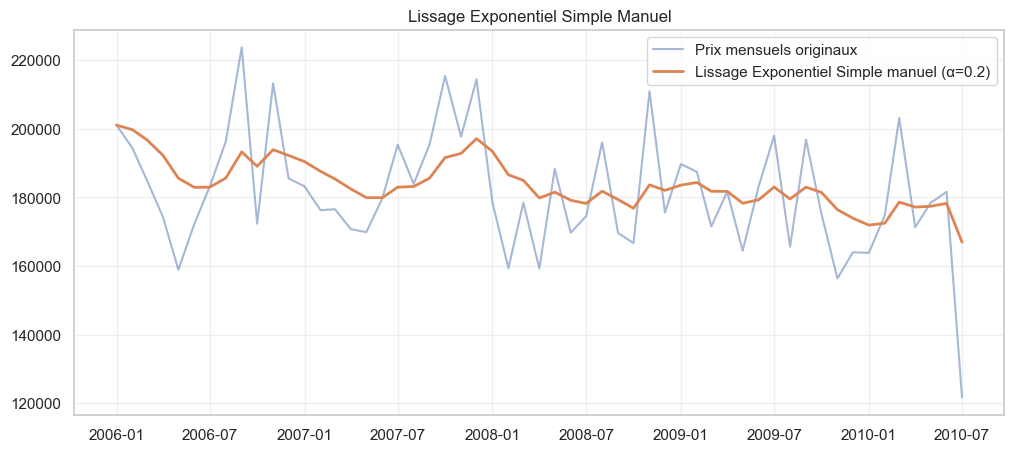

In [10]:
# Moving Average

window = 6
half_window = window // 2

manual_ma = []
for i in range(len(monthly_prices)):
    if i >= half_window and i <= len(monthly_prices) - half_window - 1:
        window_vals = monthly_prices.iloc[i - half_window : i + half_window]
        avg = window_vals.mean()
        manual_ma.append(avg)
    else:
        manual_ma.append(np.nan)

manual_ma = pd.Series(manual_ma, index=monthly_prices.index)

plt.figure(figsize=(12,5))
plt.plot(monthly_prices, alpha=0.5, label='Prix mensuels originaux')
plt.plot(manual_ma, label=f'Moyenne Mobile Manuelle ({window} mois)', linewidth=2)
plt.title('Lissage par Moyenne Mobile Manuelle')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# SES

alpha = 0.2
ses_manual = [monthly_prices.iloc[0]]

for t in range(1, len(monthly_prices)):
    ses_t = alpha * monthly_prices.iloc[t] + (1 - alpha) * ses_manual[-1]
    ses_manual.append(ses_t)

ses_manual = pd.Series(ses_manual, index=monthly_prices.index)

plt.figure(figsize=(12,5))
plt.plot(monthly_prices, alpha=0.5, label='Prix mensuels originaux')
plt.plot(ses_manual, label=f'Lissage Exponentiel Simple manuel (α={alpha})', linewidth=2)
plt.title('Lissage Exponentiel Simple Manuel')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

On voit que, malgré les deux lissages effectués, on ne constate pas vraiment de tendance spéciales sur les deux graphes, si ce n'est qu'une légère décroissance de 20'000 entre début 2006 et début 2010 en regardant le graphique de la SES. 

___________________

Maintenant, on remarque assez facilement que notre série est stationnaire, mais pour s'en persuader et pour pouvoir appliquer SARIMA, nous allons la rendre stationaire en la différenciant et en appliquant un test de stationnarité avec ADF : 

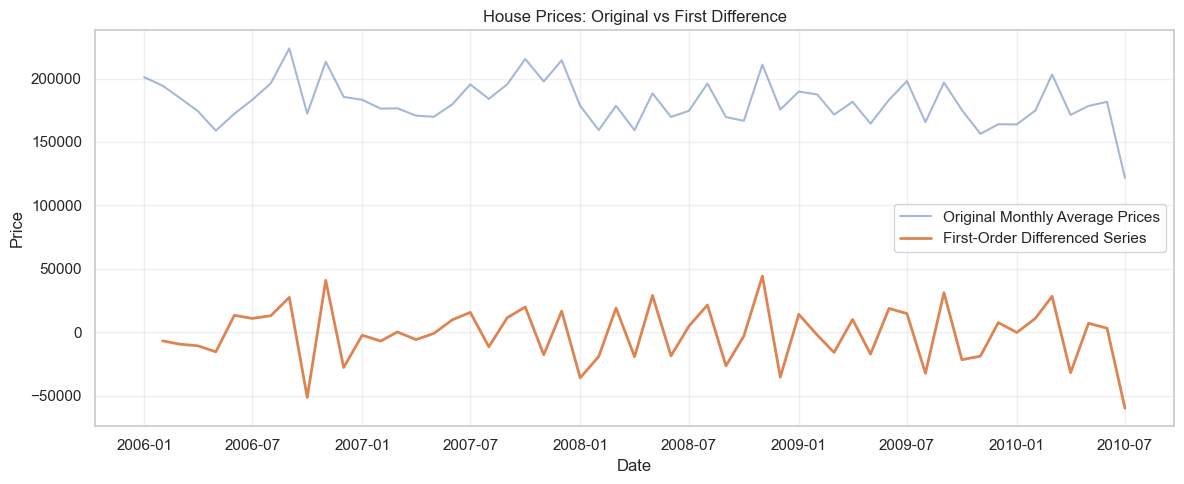

Augmented Dickey-Fuller Test on Differenced Series:
ADF Statistic: -3.864035699020967
p-value: 0.0023160587017149086
Critical Value (1%): -3.596635636000432
Critical Value (5%): -2.933297331821618
Critical Value (10%): -2.6049909750566895
The differenced series is likely stationary (p < 0.05).


In [11]:
from statsmodels.tsa.stattools import adfuller

# First-order differencing to remove trend
monthly_diff = monthly_prices.diff().dropna()

# Plot original and differenced series
plt.figure(figsize=(12, 5))
plt.plot(monthly_prices, label='Original Monthly Average Prices', alpha=0.5)
plt.plot(monthly_diff, label='First-Order Differenced Series', linewidth=2)
plt.title('House Prices: Original vs First Difference')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(monthly_diff)

# Display ADF test results
print("Augmented Dickey-Fuller Test on Differenced Series:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")

if adf_result[1] < 0.05:
    print("The differenced series is likely stationary (p < 0.05).")
else:
    print("The differenced series is likely non-stationary (p >= 0.05).")

On remarque qu'il n'y a pas beaucoup de différence entre la série originale et la série différenciée, mais grâce à ceci, nous avons la preuve que la série est bien stationnaire. Nous allons donc maintenant pouvoir créer l'ACF et la PACF pour estimer les paramètres à utiliser pour SARIMA. 

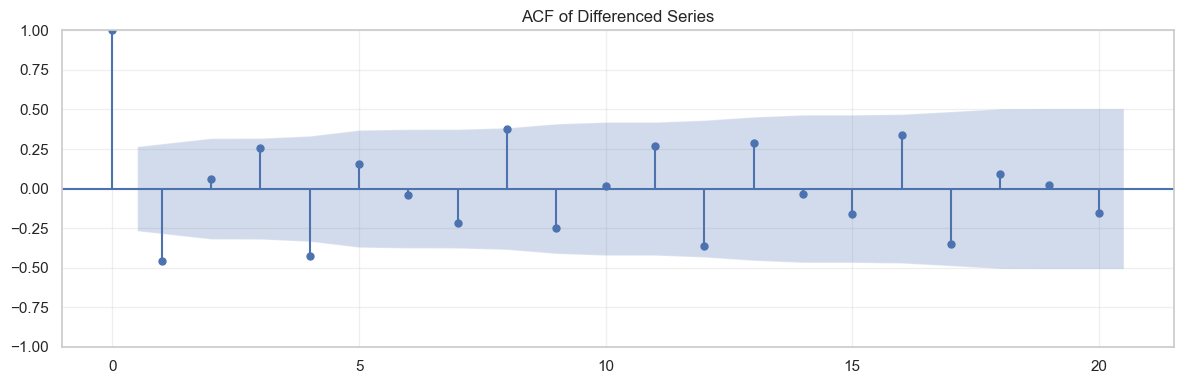

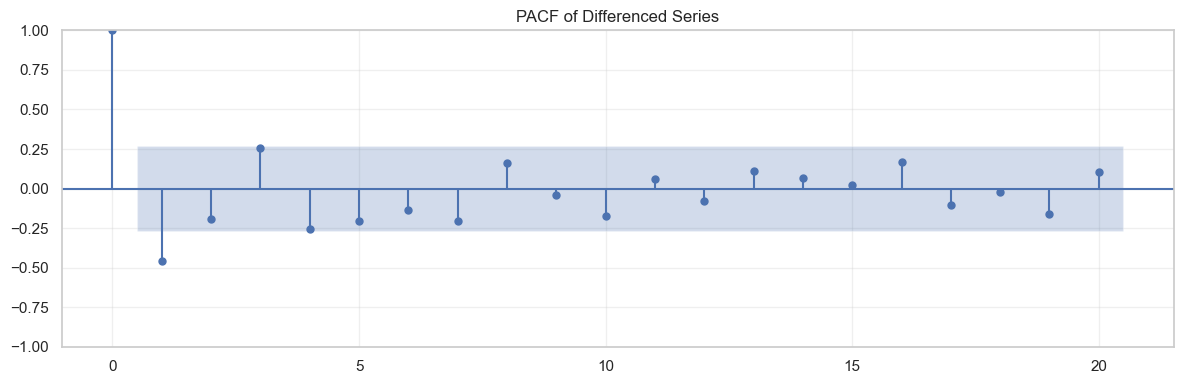

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(monthly_diff, lags=20, ax=plt.gca(), title="ACF of Differenced Series")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(monthly_diff, lags=20, ax=plt.gca(), method='ywmle', title="PACF of Differenced Series")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Pour l'ACF, on constate un premier lag à hauteur de 1, puis après, on passe directement dans les négatifs pour ensuite osciller autour de 0 avec un intervalle d'oscillation à hauteur de +-0.45. Ce schéma pourrait être typique d'un modèle MA(1). L'oscillation durable pourrait être issue d'une composante MA faible ou d'un bruit blanc persistant. Pour la PACF, c'est le même schéma, à l'exception que l'intervalle d'oscillation est à hauteur de +-0.25, soit un petit peu plus petit que pour l'ACF. C'est donc également typique à un modèle AR(1). 

_______________


Nous allons donc tester un premier modèle ARIMA avec les composantes (p, d, q) et avec p=1 car on se fie à un modèle AR(1), d=1 car nous avons différencier la série une fois, et q=1 car on se fie à un modèle MA(1). Voici ce que cela donne :

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              SalePrice   No. Observations:                   55
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -613.320
Date:                Fri, 23 May 2025   AIC                           1232.640
Time:                        13:56:13   BIC                           1238.606
Sample:                    01-01-2006   HQIC                          1234.941
                         - 07-01-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2958      0.250      1.185      0.236      -0.194       0.785
ma.L1         -0.5762      0.271     -2.129      0.033      -1.107      -0.046
sigma2      3.742e+08   4.54e-10   8.25e+17      0.0

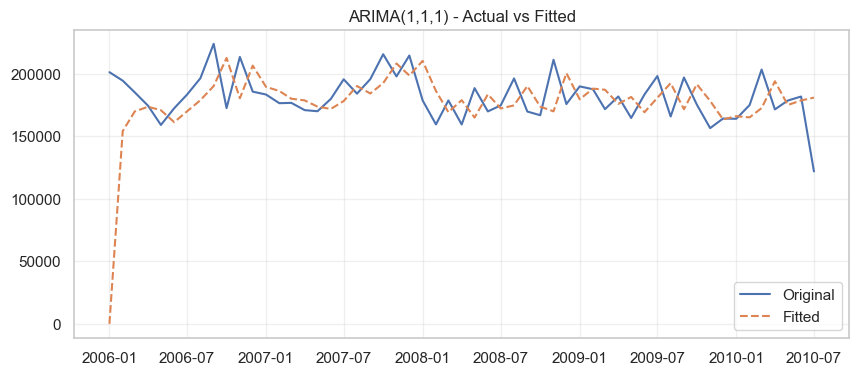

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,1)
model = ARIMA(monthly_prices, order=(1,1,1))
result = model.fit()

# Print model summary
print(result.summary())

# Plot the fitted vs actual
plt.figure(figsize=(10,4))
plt.plot(monthly_prices, label='Original')
plt.plot(result.fittedvalues, label='Fitted', linestyle='--')
plt.title("ARIMA(1,1,1) - Actual vs Fitted")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Analyse des résultats

Premièrement, on regarde la qualité des paramètres ar.L1 et ma.L1, et on remarque que ar.L1 = 0.296 et ma.L1 = -0.576. Si on regarde la p-value de chacun des deux résultats, on voit que ar.L1 est non-significatif pour notre modèle car sa p-value est égale à 0.236, il est donc peu utile dans ce modèle. Par contre, le coefficient ma.L1 possède une p-value de 0.033, qui est inférieur à 0.05, il est donc significatif dans notre modèle. 

Ensuite, si on regarde les AIC/BIC, on constate que AIC = 1232.64 et BIC = 1238.60. Ces résultats sont utiles pour comparer d'autres modèles, mais le but est que ces deux résultats soient le plus petit possible. 

Puis, si on regarde les différents tests, on constate que 